We need tools for looking at high-dimensional data.

To get a taste of this, we begin by thinking about **digital humanities.**



## Some real data



Let&rsquo;s load all of the works of Shakespeare.



In [7]:
works = ["A LOVER’S COMPLAINT",
"A MIDSUMMER NIGHT’S DREAM",
"ALL’S WELL THAT ENDS WELL",
"AS YOU LIKE IT",
"CYMBELINE",
"KING HENRY THE EIGHTH",
"KING JOHN",
"KING RICHARD THE SECOND",
"KING RICHARD THE THIRD",
"LOVE’S LABOUR’S LOST",
"MEASURE FOR MEASURE",
"MUCH ADO ABOUT NOTHING",
"PERICLES, PRINCE OF TYRE",
"THE COMEDY OF ERRORS",
"THE FIRST PART OF HENRY THE SIXTH",
"THE FIRST PART OF KING HENRY THE FOURTH",
"THE HISTORY OF TROILUS AND CRESSIDA",
"THE LIFE OF KING HENRY THE FIFTH",
"THE LIFE OF TIMON OF ATHENS",
"THE MERCHANT OF VENICE",
"THE MERRY WIVES OF WINDSOR",
"THE PASSIONATE PILGRIM",
"THE PHOENIX AND THE TURTLE",
"THE RAPE OF LUCRECE",
"THE SECOND PART OF KING HENRY THE FOURTH",
"THE SECOND PART OF KING HENRY THE SIXTH",
"THE TAMING OF THE SHREW",
"THE TEMPEST",
"THE THIRD PART OF KING HENRY THE SIXTH",
"THE TRAGEDY OF ANTONY AND CLEOPATRA",
"THE TRAGEDY OF CORIOLANUS",
"THE TRAGEDY OF HAMLET, PRINCE OF DENMARK",
"THE TRAGEDY OF JULIUS CAESAR",
"THE TRAGEDY OF KING LEAR",
"THE TRAGEDY OF MACBETH",
"THE TRAGEDY OF OTHELLO, MOOR OF VENICE",
"THE TRAGEDY OF ROMEO AND JULIET",
"THE TRAGEDY OF TITUS ANDRONICUS",
"THE TWO GENTLEMEN OF VERONA",
"THE TWO NOBLE KINSMEN",
"THE WINTER’S TALE",
"TWELFTH NIGHT; OR, WHAT YOU WILL",
"VENUS AND ADONIS"]

from urllib.request import urlopen

corpus = {}
current = []
for line in urlopen('http://www.gutenberg.org/files/100/100-0.txt'):
    line = line.decode('utf-8')
    if line.strip() in works:
        current = corpus[line.strip()] = []
    current.append( line )

for work in works:
    corpus[work] = ''.join(corpus[work])

We convert this to some vectors in `n_features`-dimensional space.



In [18]:
works

['A LOVER’S COMPLAINT',
 'A MIDSUMMER NIGHT’S DREAM',
 'ALL’S WELL THAT ENDS WELL',
 'AS YOU LIKE IT',
 'CYMBELINE',
 'KING HENRY THE EIGHTH',
 'KING JOHN',
 'KING RICHARD THE SECOND',
 'KING RICHARD THE THIRD',
 'LOVE’S LABOUR’S LOST',
 'MEASURE FOR MEASURE',
 'MUCH ADO ABOUT NOTHING',
 'PERICLES, PRINCE OF TYRE',
 'THE COMEDY OF ERRORS',
 'THE FIRST PART OF HENRY THE SIXTH',
 'THE FIRST PART OF KING HENRY THE FOURTH',
 'THE HISTORY OF TROILUS AND CRESSIDA',
 'THE LIFE OF KING HENRY THE FIFTH',
 'THE LIFE OF TIMON OF ATHENS',
 'THE MERCHANT OF VENICE',
 'THE MERRY WIVES OF WINDSOR',
 'THE PASSIONATE PILGRIM',
 'THE PHOENIX AND THE TURTLE',
 'THE RAPE OF LUCRECE',
 'THE SECOND PART OF KING HENRY THE FOURTH',
 'THE SECOND PART OF KING HENRY THE SIXTH',
 'THE TAMING OF THE SHREW',
 'THE TEMPEST',
 'THE THIRD PART OF KING HENRY THE SIXTH',
 'THE TRAGEDY OF ANTONY AND CLEOPATRA',
 'THE TRAGEDY OF CORIOLANUS',
 'THE TRAGEDY OF HAMLET, PRINCE OF DENMARK',
 'THE TRAGEDY OF JULIUS CAESAR',
 'T

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words = 'english')
X = vectorizer.fit_transform( [corpus[w] for w in works] )
#print(X)

## Similarity



Since we can&rsquo;t immediately visualize vectors in such a
high-dimensional space, it would be helpful to have some idea to
inspect our data.

One thing to try is `cosine_similarity` which, with the magic of dot
products, will describe how similar two vectors in our dataset are.



In [15]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(X,X))

[[1.         0.1075922  0.09300843 ... 0.10617408 0.         0.13526644]
 [0.1075922  1.         0.17978008 ... 0.11142017 0.0163008  0.10318492]
 [0.09300843 0.17978008 1.         ... 0.169203   0.00278056 0.0808662 ]
 ...
 [0.10617408 0.11142017 0.169203   ... 1.         0.00218398 0.09154843]
 [0.         0.0163008  0.00278056 ... 0.00218398 1.         0.01079105]
 [0.13526644 0.10318492 0.0808662  ... 0.09154843 0.01079105 1.        ]]


### Homework



Can you use `matplotlib` to make a nicer plot of this?



## Dimensionality reduction



It would also help if we had (unsupervised!) methods for reducing
dimension.  Here is one.



In [22]:
from sklearn.decomposition import TruncatedSVD
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(X)  
X2 = tsvd.transform(X)

After applying this transformation, our high-dimensional data is now
two-dimensional!  Thus, we can plot it.



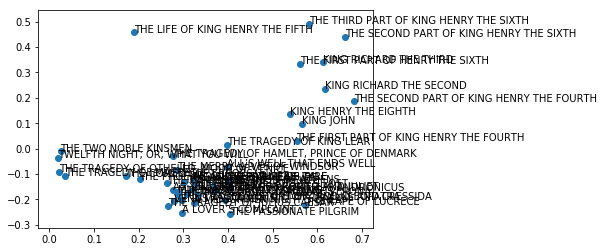

In [24]:
import matplotlib.pyplot as plt
plt.scatter( X2[:,0], X2[:,1] )
for i, w in enumerate(works):
    plt.text( X2[i,0], X2[i,1], w )
plt.show()

You might notice that **The Two Noble Kinsmen** is sitting off by
itself.  If we look in Wikipedia, we read: &ldquo;Formerly a point of
controversy, the dual attribution is now generally accepted by
scholarly consensus.&rdquo;  So Shakespeare was not alone in writing **The
Two Noble Kinsmen**.



## Multidimensional scaling



There are other ways to embed our high-dimensional data into some
smaller space.  Earlier we computed `cosine_similarity(X,X)` as a
similarity matrix.

Multidimensional scaling (usually abbreviated to MDS) transforms a
distance matrix into a configuration of vectors.  We found a
similarity matrix, but what we really need is a **dissimilarity**
matrix.



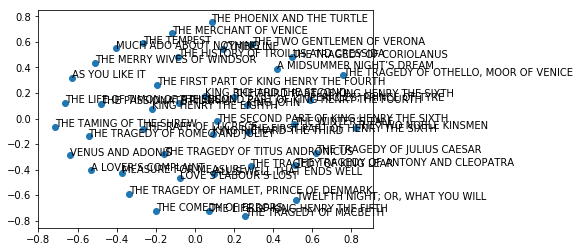

In [25]:
from sklearn.manifold import MDS
embedding = MDS(n_components=2, dissimilarity='precomputed')
X_transformed = embedding.fit_transform(1 - cosine_similarity(X,X))

plt.scatter( X_transformed[:,0], X_transformed[:,1] )
for i, w in enumerate(works):
    plt.text( X_transformed[i,0], X_transformed[i,1], w )
plt.show()

### Homework



Last week we learned how to make 3-D plots; can you do this with the
dimensionality reduction code?

